In [1]:
import numpy as np
import matplotlib.pyplot as  plt
import matplotlib.cm as cm
import cv2 as cv

# Theory

## Difference of gaussian
Low cost substitute for laplacian of gaussian

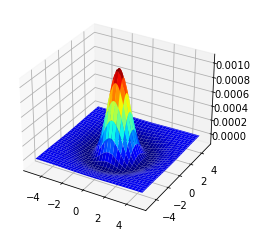

In [13]:
sigma = 1
k = 1.8
XX, YY = np.meshgrid(np.arange(-5,5+0.1, 0.1), np.arange(-5,5+0.1, 0.1))
g = np.exp(-(XX**2 + YY**2)/(2*sigma**2))
g /= g.sum()
g_k = np.exp(-(XX**2 + YY**2)/(2*(sigma*k)**2))
g_k /= g_k.sum()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XX, YY, g-g_k, cmap=cm.jet)

plt.show()

# Implementation

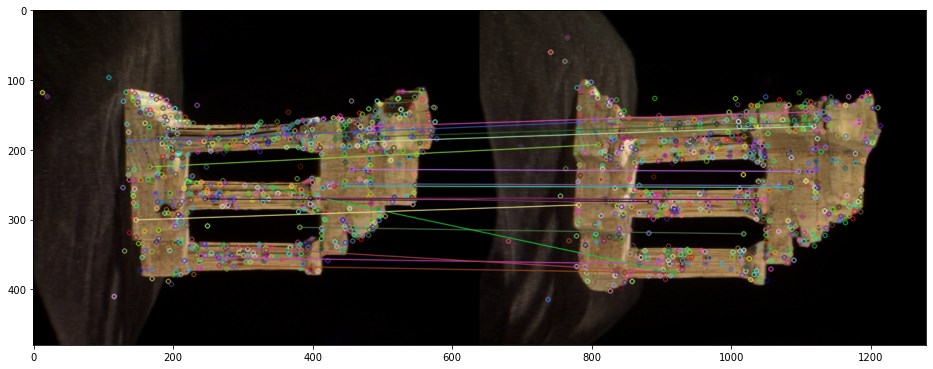

In [19]:

im1 = cv.imread('./assets/templeSparseRing/templeSR0001.png', cv.IMREAD_COLOR)
im2 = cv.imread('./assets/templeSparseRing/templeSR0002.png', cv.IMREAD_COLOR)

# sift object
sift = cv.SIFT_create()
# matcher
index_params = {"algorithm":1, "trees":5}
search_params = {"checks":100}
flann = cv.FlannBasedMatcher(index_params, search_params)

# matching
kp1, desc1 = sift.detectAndCompute(im1, None)
kp2, desc2 = sift.detectAndCompute(im2, None)
matches = flann.knnMatch(desc1, desc2, k=2)
good_matches = []

# select the most accurate matches
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        good_matches.append(m)

good_matches = sorted(good_matches, key=lambda x: x.distance)

im3 = cv.drawMatches(im1, kp1, im2, kp2, good_matches[20:40], im2)

fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(cv.cvtColor(im3, cv.COLOR_BGR2RGB))

plt.show()